In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Visualize the distribution of errors(residuals) for a multiple linear regression model using diamonds dataset

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

In [6]:
X = df[features]
y = df[target]

In [7]:
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [8]:
y 

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [10]:
model = LinearRegression()

In [11]:
model

LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
error = mean_squared_error(y_test, y_pred)
error

2140750.137628498

In [15]:
residuals = y_test - y_pred

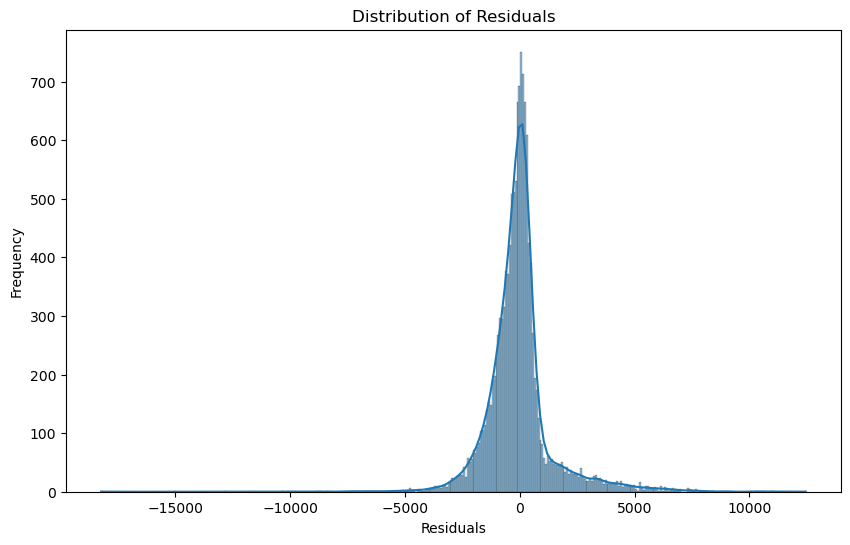

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#  Calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [17]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [18]:
print(mse)
print(mae)
print(rmse)

2140750.137628498
890.3764004285609
1463.130253131449


# Check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

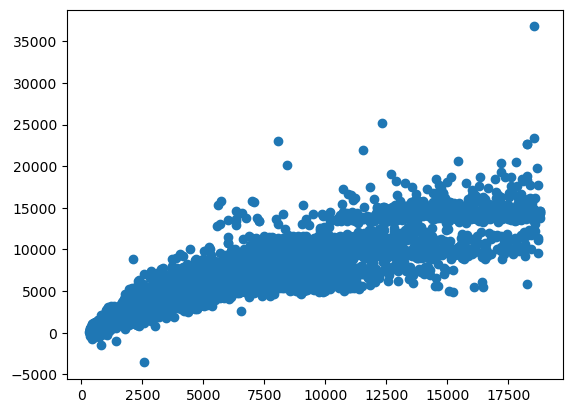

In [19]:
# Linearity
plt.scatter(y_test, y_pred)
plt.show()

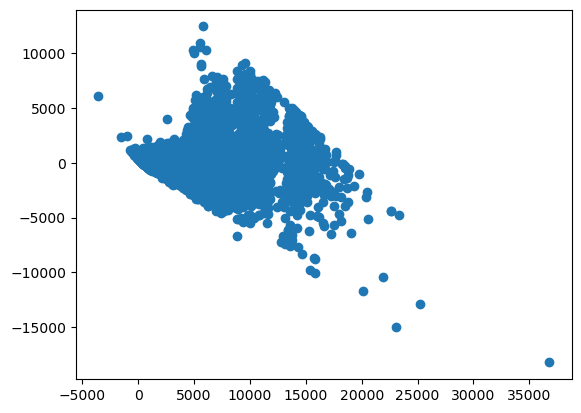

In [20]:
# homoscedasticity
plt.scatter(y_pred, residuals)

<Figure size 500x600 with 0 Axes>

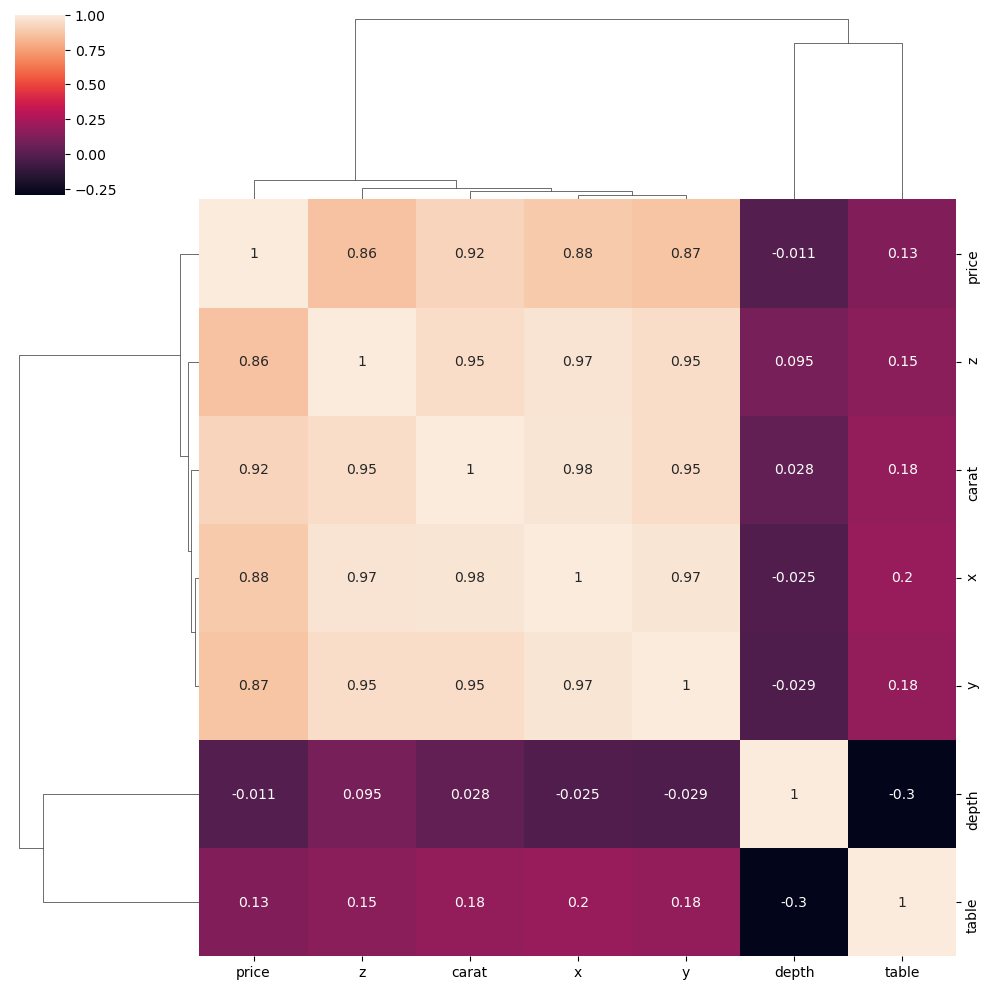

In [21]:
# corelation matrix 
plt.figure(figsize = (5,6))
sns.clustermap(df.corr(numeric_only = True), annot = True)

#  Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
X = df.drop(['price','cut','color','clarity'], axis = 1)
y = df['price']

In [24]:
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [25]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [27]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R^2 Score

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2140750.137628498
R^2 Score: 0.8615514393114848


# Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score

In [28]:
model

LinearRegression()

In [29]:
print(model.coef_)
print()
print(model.intercept_)
print()
print(r2_score(y_test, y_pred))

[10479.64722682  -199.87725876  -102.34157431 -1224.74425649
    41.70845285    71.50629605]

20325.022329394156

0.8615514393114848


#  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results

In [30]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


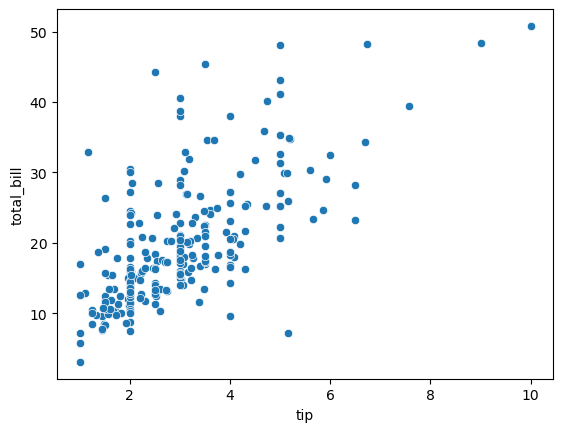

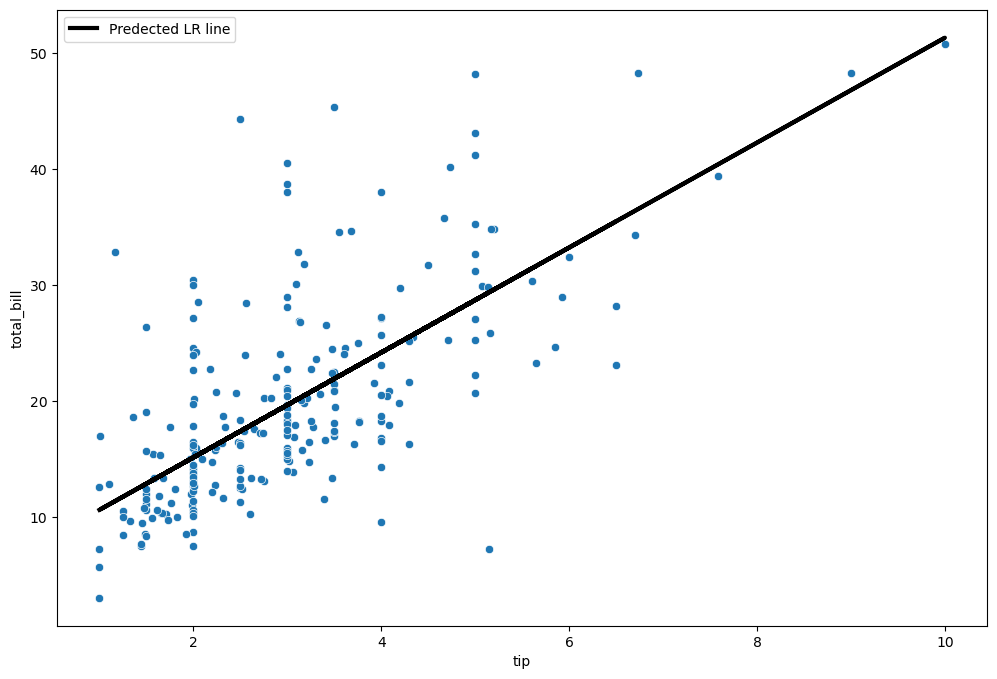

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['tip']]
y = df[['total_bill']]

sns.scatterplot(x = 'tip', y = 'total_bill', data = df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'tip',y = 'total_bill', data = df)
plt.plot(X_test, y_pred, color = 'black', linewidth = 3, label = "Predected LR line")
plt.legend()
plt.show()


# Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line

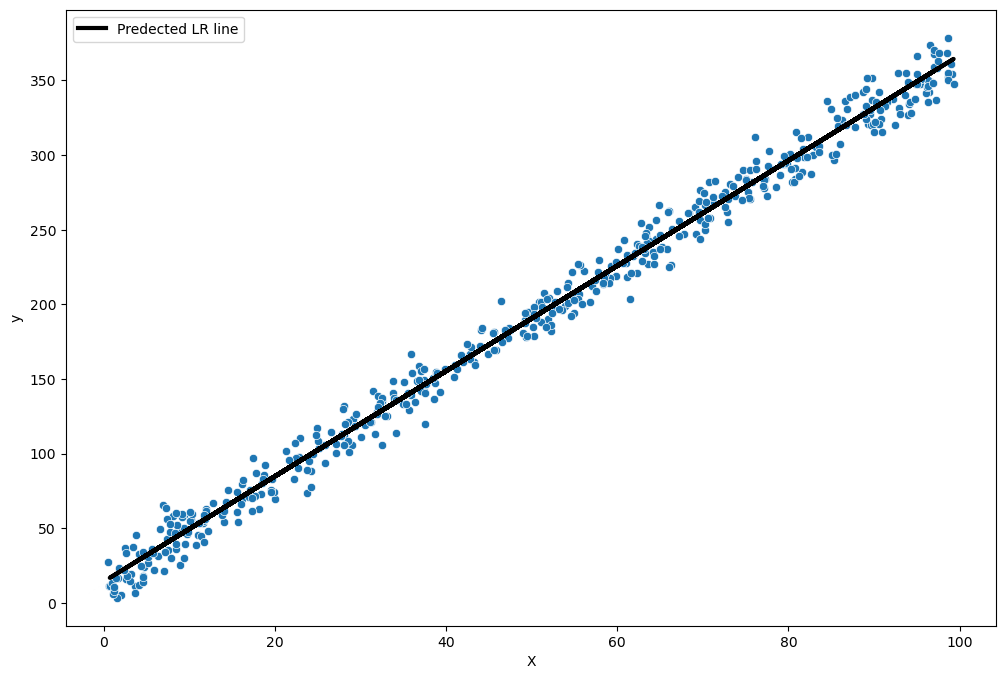

In [32]:
np.random.seed(42)

# Generate synthetic features (independent variables)
num_samples = 500

# Independent variable (X)
X = np.random.uniform(0, 100, num_samples)  # Random values between 0 and 100

# Coefficients and noise
slope = 3.5
intercept = 15
noise = np.random.normal(0, 10, num_samples)  # Adding some random noise

# Dependent variable (y)
y = slope * X + intercept + noise

# Create the DataFrame
df = pd.DataFrame({
    'X': X,
    'y': y
})
X = df[['X']]
y = df[['y']]
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'X',y = 'y', data = df)
plt.plot(X_test, y_pred, color = 'black', linewidth = 3, label = "Predected LR line")
plt.legend()
plt.show()

# Write a Python script that pickles a trained linear regression model and saves it to a file

In [33]:
import pickle
model
pickle.dump(model, open("model.pkl", "wb")) # wb >> write binary
# python's object(model), its attributes and methods are converted into bytes stream

# Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve

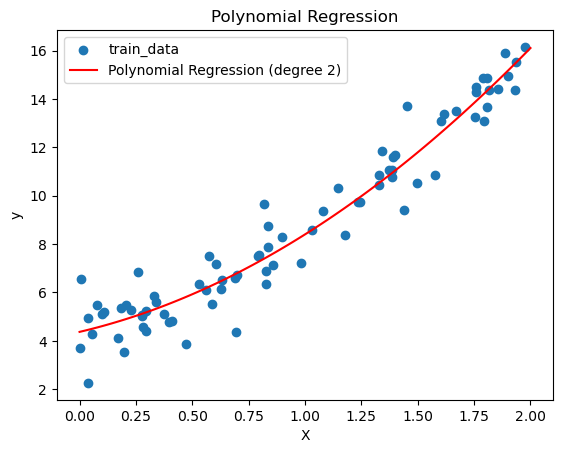

In [34]:
np.random.seed(1)
X = 2*np.random.rand(100, 1)
# generate random synthetic y 
y = 4 + 3*X + 1.5*X**2 + np.random.randn(100,1)
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
poly_features

X_poly_train = poly_features.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

poly_reg.fit(X_poly_train, y_train)

y_pred = poly_reg.predict(X_poly_train)

degree = 2
plt.scatter(X_train, y_train, label = 'train_data')
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color = 'red', label = f"Polynomial Regression (degree {degree})")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Q10 Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept

In [35]:
X = pd.DataFrame(np.random.uniform(0, 100, 1000))
y = 3*X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[3.]]
[0.]


# Q11 Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance

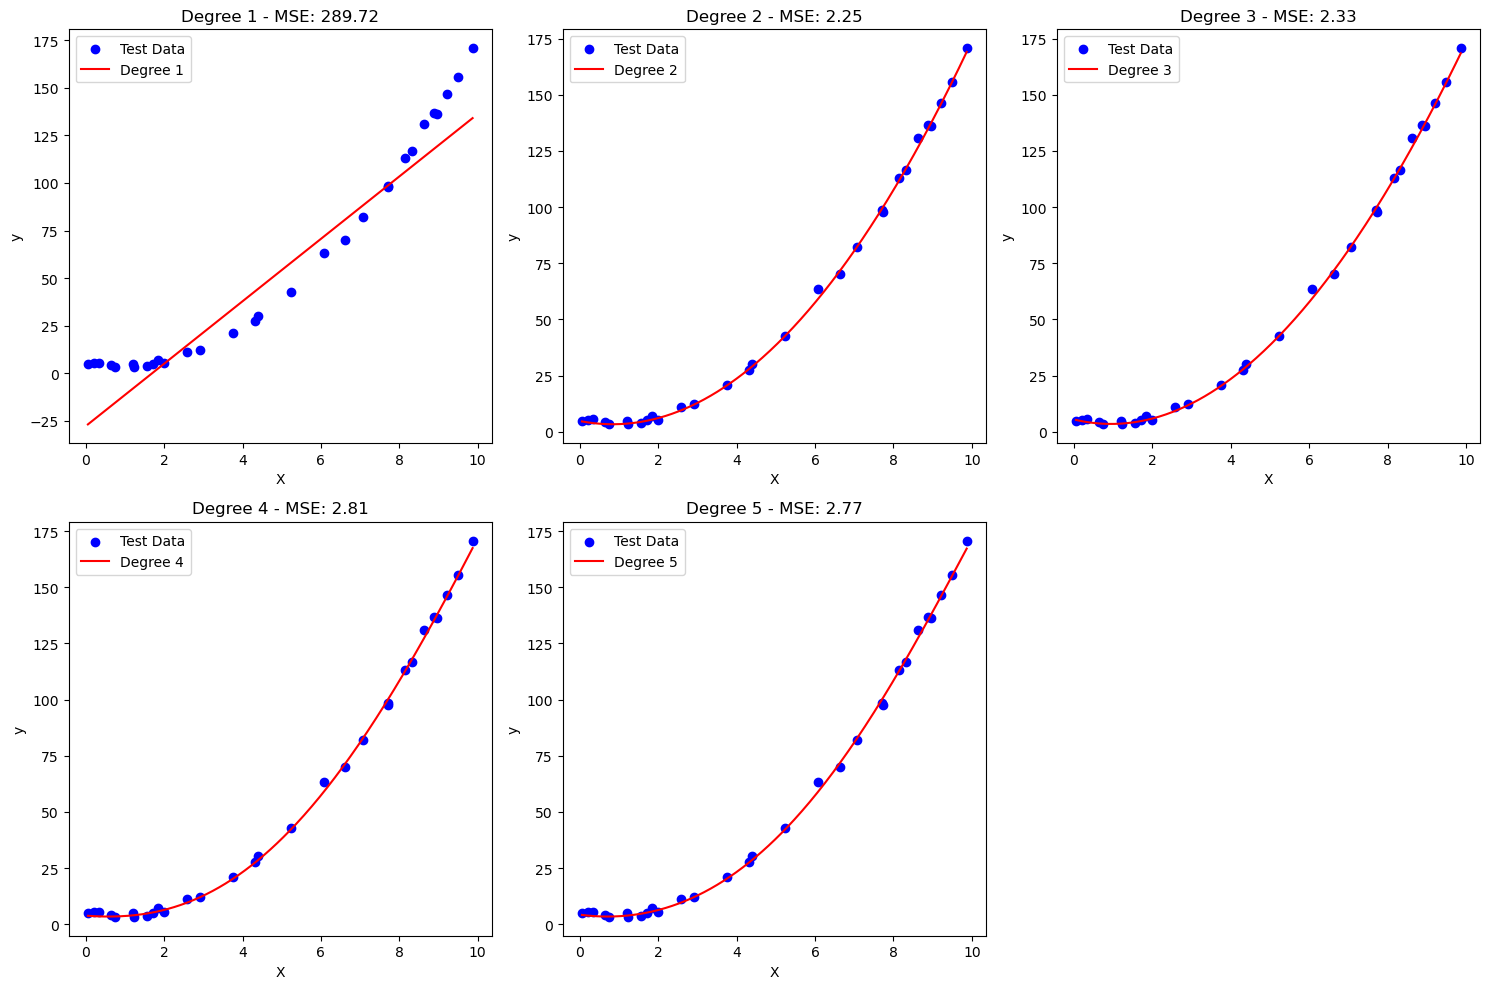


Model Performance Comparison (MSE):
Degree 1: MSE = 289.72
Degree 2: MSE = 2.25
Degree 3: MSE = 2.33
Degree 4: MSE = 2.81
Degree 5: MSE = 2.77


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X**2 - 3 * X + 4 + np.random.normal(0, 2, (100, 1))  # Quadratic relationship with noise

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting Polynomial Regression Models with different degrees
degrees = [1, 2, 3, 4, 5]
mse_scores = []

plt.figure(figsize=(15, 10))  # Larger plot size for better visualization

for i, degree in enumerate(degrees, 1):
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Training the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_poly)
    
    # Calculating the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    # Plotting the results
    plt.subplot(2, 3, i)
    
    # Plotting the original data
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    
    # Creating smooth line for the polynomial fit
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    plt.plot(X_range, y_range_pred, color='red', label=f'Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Degree {degree} - MSE: {mse:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Displaying MSE scores for each degree
print("\nModel Performance Comparison (MSE):")
for degree, mse in zip(degrees, mse_scores):
    print(f"Degree {degree}: MSE = {mse:.2f}")


# Q12 Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score

In [37]:
np.random.seed(42)

X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 5

X = np.column_stack((X1, X2))
y = 3 * X1 + 2 * X2 + np.random.normal(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(f"Feature 1 Coefficient: {model.coef_[0]:.4f}")
print(f"Feature 2 Coefficient: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score: {r2:.4f}")



Model Coefficients:
Feature 1 Coefficient: 2.9659
Feature 2 Coefficient: 2.3364
Intercept: -0.5575

R-squared Score: 0.9655


# Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points

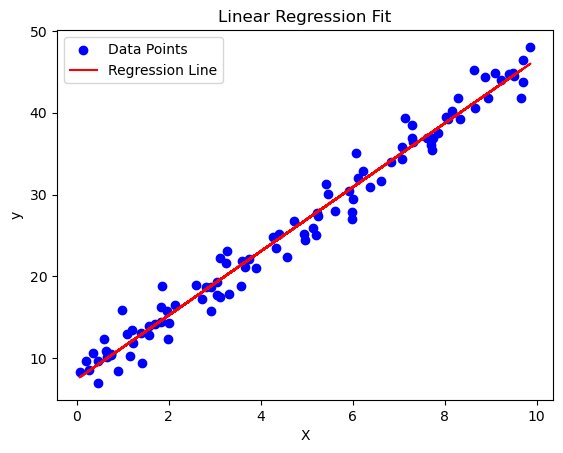


Model Coefficient: 3.9080453545753935
Model Intercept: 7.430192315093496


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.random.rand(100, 1) * 10
y = 4 * X + 7 + np.random.normal(0, 2, (100, 1))

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

print("\nModel Coefficient:", model.coef_[0][0])
print("Model Intercept:", model.intercept_[0])


#  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(42)

X1 = np.random.rand(100) * 10
X2 = 2 * X1 + np.random.rand(100) * 5  # Correlated with X1
X3 = np.random.rand(100) * 15
X4 = np.random.rand(100) * 20

data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print("\nVariance Inflation Factor (VIF) for Each Feature:")
print(vif_data)



Variance Inflation Factor (VIF) for Each Feature:
  Feature        VIF
0      X1  53.174132
1      X2  63.139772
2      X3   2.715976
3      X4   2.585478


#  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve

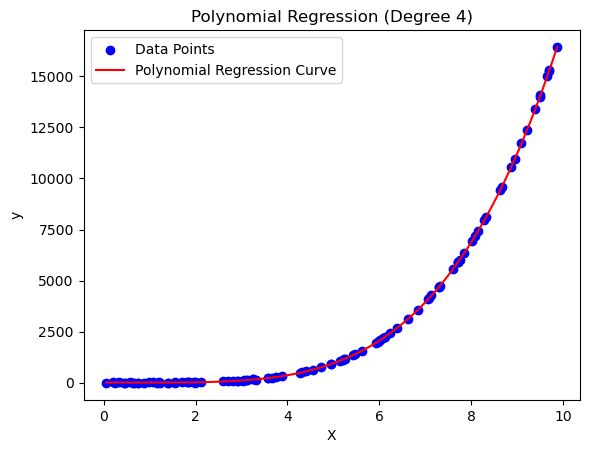


Model Coefficients: [[ 0.         -4.1383922   2.16600212 -2.6265785   1.97934888]]
Model Intercept: [10.45124216]


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.random.rand(100, 1) * 10
y = 2 * X**4 - 3 * X**3 + 4 * X**2 - 5 * X + 6 + np.random.normal(0, 10, (100, 1))

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()

print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)

X = np.random.rand(200, 3) * 10
y = 5 * X[:, 0] - 3 * X[:, 1] + 2 * X[:, 2] + np.random.normal(0, 5, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("\nR-squared Score:", r2)


R-squared Score: 0.9272706159053725


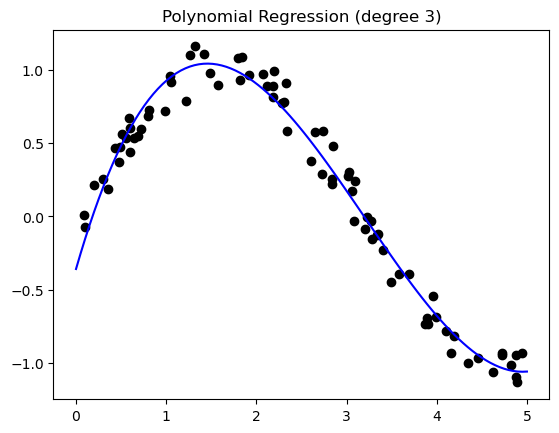

In [46]:
# Q17 - Polynomial Regression (degree 3)

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
plt.scatter(X, y, color='black')
X_fit = np.linspace(0, 5, 100)[:, np.newaxis]
y_fit = model.predict(poly.transform(X_fit))
plt.plot(X_fit, y_fit, color='blue')
plt.title("Polynomial Regression (degree 3)")
plt.show()

In [49]:
# Q18 - Multiple Linear Regression with 5 features
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=1)
model = LinearRegression().fit(X, y)
print(r2_score(y, model.predict(X)),model.coef_)

0.9999982895718759 [ 7.62500767 50.8005152  35.70594826 26.1580429  20.66388192]


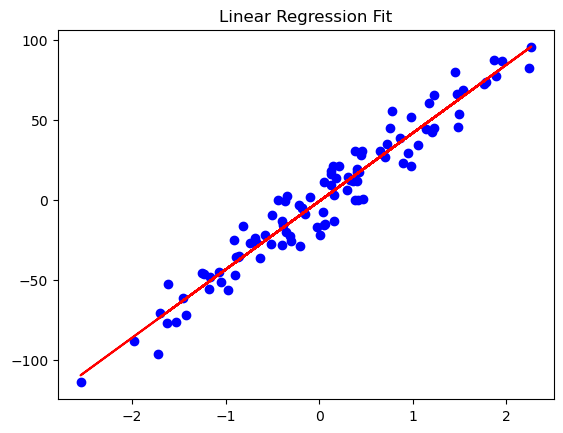

In [51]:
# Q19 - Generate data, fit model, visualize


X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
model = LinearRegression().fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Linear Regression Fit")
plt.show()

In [53]:
# Q20 - Synthetic dataset with 3 features

X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=0)
model = LinearRegression().fit(X, y)
print(r2_score(y, model.predict(X)), model.coef_)

0.9999574677146861 [39.86238456  6.36284272 62.83246593]


In [56]:
# Q21 - Serialize and deserialize using joblib
import joblib

X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
model = LinearRegression().fit(X, y)
joblib.dump(model, "model.pkl")
loaded_model = joblib.load("model.pkl")
print(r2_score(y, loaded_model.predict(X)))

0.9999967227397031


In [57]:
# Q22 - Linear regression with categorical features (Seaborn tips dataset)

tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']
X = pd.get_dummies(X, drop_first=True)
model = LinearRegression().fit(X, y)
print(r2_score(y, model.predict(X)), model.coef_)

0.4613641828591972 [ 0.10592726  0.03762835  0.14177083  0.17570241  0.09660971  0.22623442
 -0.13242948]


In [61]:
# Q23 - Ridge vs Linear Regression
from sklearn.linear_model import LinearRegression, Ridge


X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
lr = LinearRegression().fit(X, y)
rr = Ridge(alpha=1.0).fit(X, y)
print("LinearRegression:", {"r2": r2_score(y, lr.predict(X)), "coef": lr.coef_})
print("RidgeRegression:", {"r2": r2_score(y, rr.predict(X)), "coef": rr.coef_})

LinearRegression: {'r2': 0.9999995672946331, 'coef': array([77.37823109, 59.31399602, 74.64960812, 40.56399652, 41.42799692])}
RidgeRegression: {'r2': 0.9998991082204618, 'coef': array([76.5479348 , 58.9122611 , 73.49663453, 40.51924287, 40.90948128])}


In [64]:
# Q24 - Cross-validation
from sklearn.model_selection import cross_val_score

X, y = make_regression(n_samples=100, n_features=4, noise=5)
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores.mean()

0.9987272242857423

In [66]:
# Q25 - Polynomial regression comparison
from sklearn.pipeline import make_pipeline


X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.randn(100) * 0.1
results = {}
for degree in range(1, 6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    r2 = r2_score(y, model.predict(X))
    results[f"Degree {degree}"] = r2
results

{'Degree 1': 0.6493104561304983,
 'Degree 2': 0.6621263576290193,
 'Degree 3': 0.9771385789450575,
 'Degree 4': 0.9775240029484628,
 'Degree 5': 0.9820014585959339}